In [2]:
import sys
sys.path.insert(0, '../../clones/PINNs/Utilities/')
import tensorflow as tf
import numpy as np
import scipy.io

In [3]:
data = scipy.io.loadmat('../../clones/PINNs/main/Data/cylinder_nektar_wake.mat')

           
U_star = data['U_star'] # N x 2 x T
P_star = data['p_star'] # N x T
t_star = data['t'] # T x 1
X_star = data['X_star'] # N x 2

N = X_star.shape[0]
T = t_star.shape[0]

# Rearrange Data 
XX = np.tile(X_star[:,0:1], (1,T)) # N x T
YY = np.tile(X_star[:,1:2], (1,T)) # N x T
TT = np.tile(t_star, (1,N)).T # N x T

UU = U_star[:,0,:] # N x T
VV = U_star[:,1,:] # N x T
PP = P_star # N x T

x = XX.flatten()[:,None] # NT x 1
y = YY.flatten()[:,None] # NT x 1
t = TT.flatten()[:,None] # NT x 1

u = UU.flatten()[:,None] # NT x 1
v = VV.flatten()[:,None] # NT x 1
p = PP.flatten()[:,None] # NT x 1

In [6]:
N*T

1000000

In [5]:
T

200

In [30]:
from scipy.signal import correlate2d
import numpy as np
import matplotlib.pyplot as plt

In [13]:
length = 100
matrix_a = np.random.rand(length, length)
matrix_b = np.random.rand(length, length)

In [14]:
%timeit correlate2d(matrix_a, matrix_b)

752 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
x_autocor = [correlate2d(matrix_a, np.roll(matrix_a, shift, axis=0)) for shift in range(1, 100)]

In [17]:
y_autocor = [correlate2d(matrix_a, np.roll(matrix_a, shift, axis=1)) for shift in range(1, 100)]

In [13]:
from numpy.fft import fft, ifft
from scipy.signal import correlate

In [19]:
data = list(range(16))
data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [20]:
print(f" mean: {np.mean(data)}, std: {np.std(data)}")

 mean: 7.5, std: 4.6097722286464435


In [26]:
r = fft(data)
R_t = ifft(r *np.conjugate(r)).real
#print(np.sqrt(R_t))
print(R_t)

[1240. 1120. 1016.  928.  856.  800.  760.  736.  728.  736.  760.  800.
  856.  928. 1016. 1120.]


In [22]:
r

array([120. +0.j        ,  -8.+40.21871594j,  -8.+19.3137085j ,
        -8.+11.9728461j ,  -8. +8.j        ,  -8. +5.3454291j ,
        -8. +3.3137085j ,  -8. +1.59129894j,  -8. +0.j        ,
        -8. -1.59129894j,  -8. -3.3137085j ,  -8. -5.3454291j ,
        -8. -8.j        ,  -8.-11.9728461j ,  -8.-19.3137085j ,
        -8.-40.21871594j])

In [25]:
autocorr(data)

array([1240, 1120, 1001,  884,  770,  660,  555,  456,  364,  280,  205,
        140,   86,   44,   15,    0])

In [21]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

autocorr(data)

array([1240, 1120, 1001,  884,  770,  660,  555,  456,  364,  280,  205,
        140,   86,   44,   15,    0])

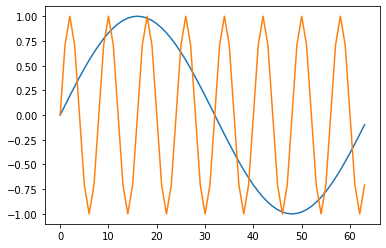

In [65]:
L = 2**6
t = np.arange(L)
sin_1 = np.sin(2*np.pi*t/L)
sin_2 = np.sin(8*2*np.pi*t/L)
plt.plot(t, sin_1)
plt.plot(t, sin_2)
plt.show()

In [66]:
f_sin_1 = np.fft.fft(sin_1)
f_sin_2 = np.fft.fft(sin_2)

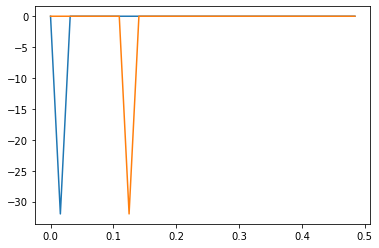

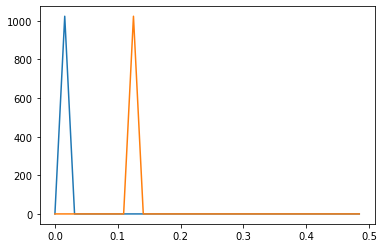

In [68]:
timestep = 1.0
freq = np.fft.fftfreq(L, d=timestep)
#plt.plot(freq[:L//2], f_sin_1[:L//2].real)
plt.plot(freq[:L//2], f_sin_1[:L//2].imag)
#plt.plot(freq[:L//2], f_sin_2[:L//2].real)
plt.plot(freq[:L//2], f_sin_2[:L//2].imag)
plt.show()

#plt.plot(freq[:L//2], f_sin_1[:L//2].real)
plt.plot(freq[:L//2], np.abs(f_sin_1[:L//2])**2)
#plt.plot(freq[:L//2], f_sin_2[:L//2].real)
plt.plot(freq[:L//2], np.abs(f_sin_2[:L//2])**2)
plt.show()

In [52]:
L//2

16

In [70]:
np.fft.fftfreq(20, d=1.0)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05])